In [5]:
import pandas as pd

# Ссылка на файл HR.csv
file_url = "https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1"

# Загрузка данных в pandas dataframe
df = pd.read_csv(file_url)

# Вывод первых нескольких строк dataframe для проверки
print(df.head())
# Вывод описания данных в датафрейме
df_info = df.info()

# Вывод результатов
print(df_info)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [4]:
# Рассчет основных статистик для переменных
statistics = df.describe(include='all')

# Добавление моды
statistics.loc['mode'] = df.mode().iloc[0]

# Вывод результатов
print(statistics)

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   
mode              0.100000         0.550000        4.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique            

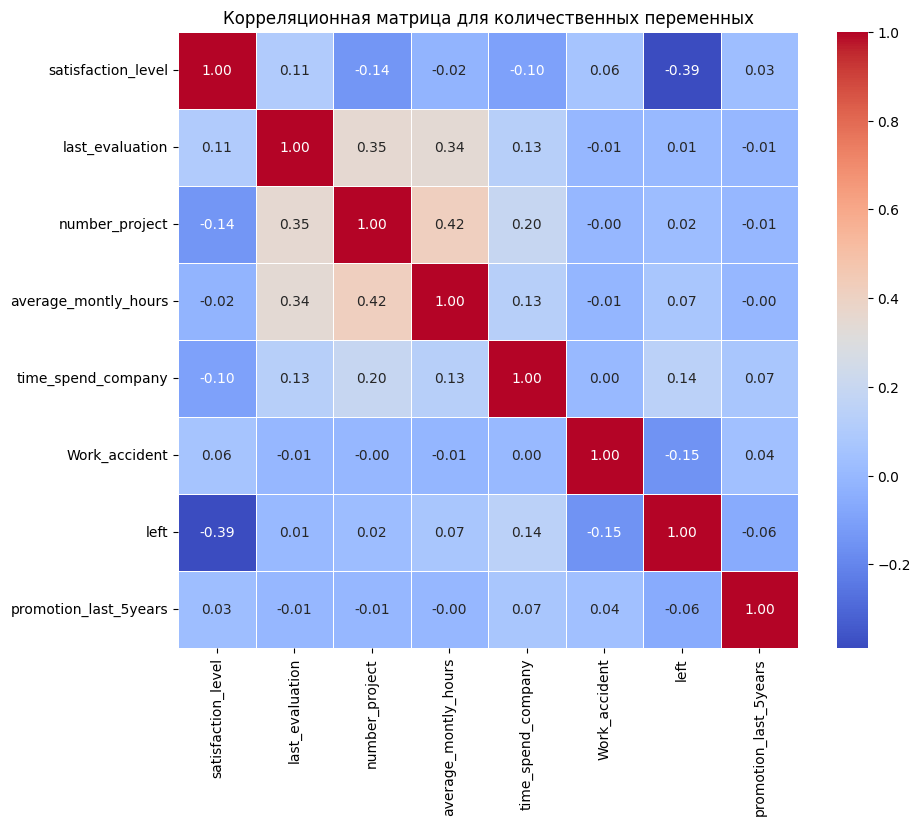

Две самые скоррелированные переменные: ['satisfaction_level', 'satisfaction_level']
Две наименее скоррелированные переменные: ['time_spend_company', 'Work_accident']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор количественных переменных
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

# Рассчет корреляционной матрицы
correlation_matrix = numerical_variables.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица для количественных переменных')
plt.show()

# Определение двух самых и двух наименее скоррелированных переменных
max_corr_pair = correlation_matrix.abs().stack().idxmax()
min_corr_pair = correlation_matrix.abs().stack().idxmin()

max_corr_variables = [max_corr_pair[0], max_corr_pair[1]]
min_corr_variables = [min_corr_pair[0], min_corr_pair[1]]

print(f"Две самые скоррелированные переменные: {max_corr_variables}")
print(f"Две наименее скоррелированные переменные: {min_corr_variables}")


In [7]:
# Рассчет количества сотрудников в каждом департаменте
employees_by_department = df['department'].value_counts()

# Вывод результатов
print("Количество сотрудников в каждом департаменте:")
print(employees_by_department)


Количество сотрудников в каждом департаменте:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


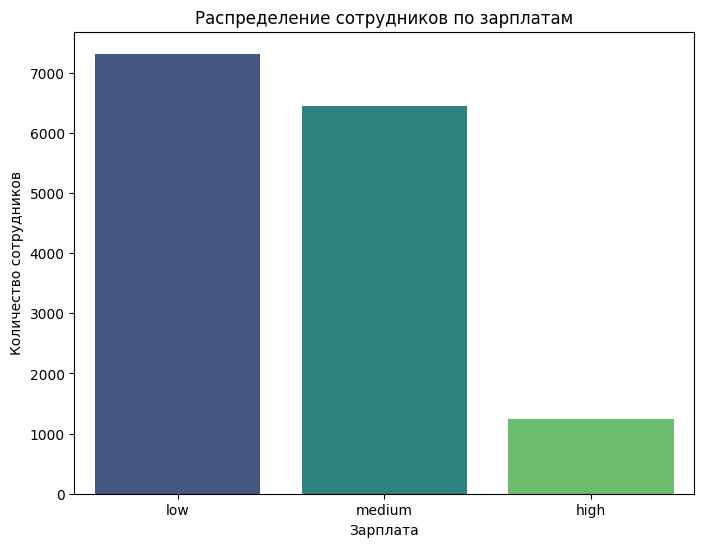

In [8]:
# Гистограмма распределения зарплат
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

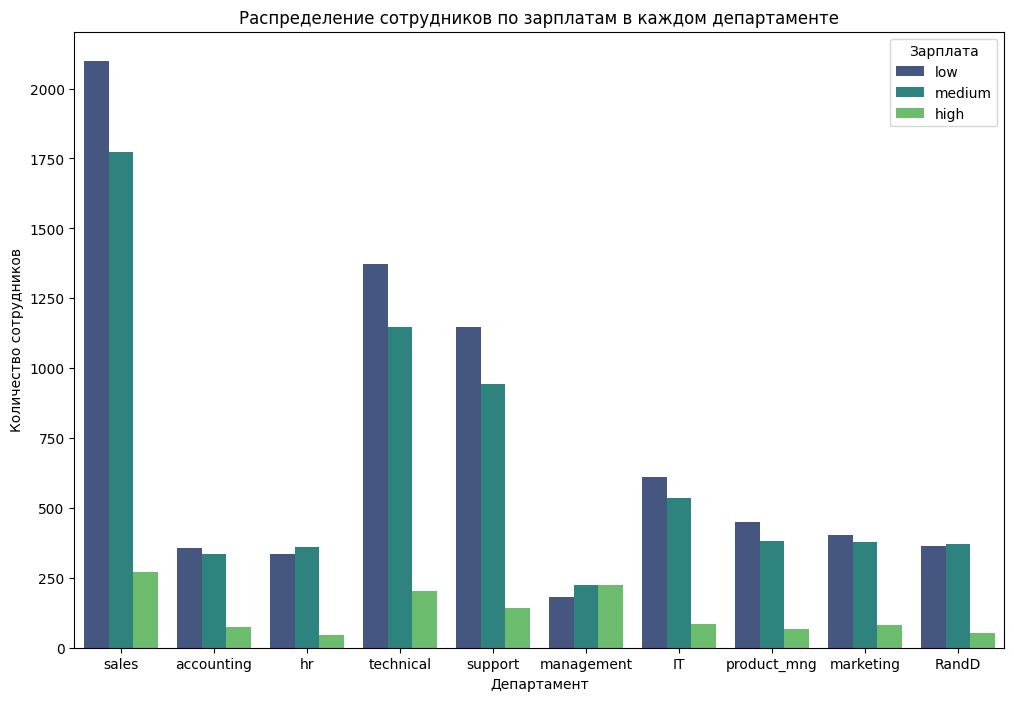

In [9]:
# Гистограмма распределения зарплат в каждом департаменте
plt.figure(figsize=(12, 8))
sns.countplot(x='department', hue='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Зарплата')
plt.show()

In [12]:
from scipy import stats

# Выделение данных для сотрудников с высоким и низким окладом
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

# Вывод результатов
print(f"Статистика t: {t_statistic}")
print(f"p-значение: {p_value}")

# Определение статистической значимости
alpha = 0.05
if p_value < alpha:
    print("Гипотеза отвергается: Есть статистически значимая разница во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.")
else:
    print("Гипотеза не отвергается: Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.")

Статистика t: -0.7288680398062308
p-значение: 0.4661023478267259
Гипотеза не отвергается: Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.


In [13]:
# Рассчет показателей для уволившихся сотрудников
left_employees = df[df['left'] == 1]

# Доля сотрудников с повышением за последние 5 лет
promotion_left = left_employees['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
satisfaction_left = left_employees['satisfaction_level'].mean()

# Среднее количество проектов
projects_left = left_employees['number_project'].mean()

# Рассчет показателей для не уволившихся сотрудников
still_employees = df[df['left'] == 0]

# Доля сотрудников с повышением за последние 5 лет
promotion_still = still_employees['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
satisfaction_still = still_employees['satisfaction_level'].mean()

# Среднее количество проектов
projects_still = still_employees['number_project'].mean()

# Вывод результатов
print("Уволившиеся сотрудники:")
print(f"Доля с повышением за последние 5 лет: {promotion_left:.2%}")
print(f"Средняя степень удовлетворенности: {satisfaction_left:.2f}")
print(f"Среднее количество проектов: {projects_left:.2f}")
print("\nНе уволившиеся сотрудники:")
print(f"Доля с повышением за последние 5 лет: {promotion_still:.2%}")
print(f"Средняя степень удовлетворенности: {satisfaction_still:.2f}")
print(f"Среднее количество проектов: {projects_still:.2f}")


Уволившиеся сотрудники:
Доля с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86

Не уволившиеся сотрудники:
Доля с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Исключение столбцов 'department' и 'salary'
X = df.drop(['left', 'department', 'salary'], axis=1)

# Целевая переменная
y = df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.2%}")
print("\nМатрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(classification_rep)


Точность модели: 75.33%

Матрица ошибок:
[[2094  200]
 [ 540  166]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



Модель показывает хорошую точность в предсказании не уволившихся (Precision=0.79), но низкую чувствительность к предсказанию увольнения (Recall=0.24).
F1-score (среднее гармоническое precision и recall) также невысок, что может свидетельствовать о несбалансированности классов.